# **K-fold Cross Validation**

* As you seen in the previous example, to evaluate the model we have splitted the train_set in two part:
  * x_val
  * partial_x_train

* But if we have few data, the validation set would end up being very small

* As a consequence, the validation scores might change a lot depending on which data we chose to use for validation and which we chose for training: so the validation scores might have a high variance with regard to the validation split.

* In this case, the best practice is to use K-fold cross-validation

* It consists of:
  * splitting the available data into K partitions 
  * instantiating K identical models, and 
  * training each one on K – 1 partitions while evaluating on the remaining partition
  
* The validation score for the model used is then the average of the K validation scores obtained. In terms of code, this is straightforward.

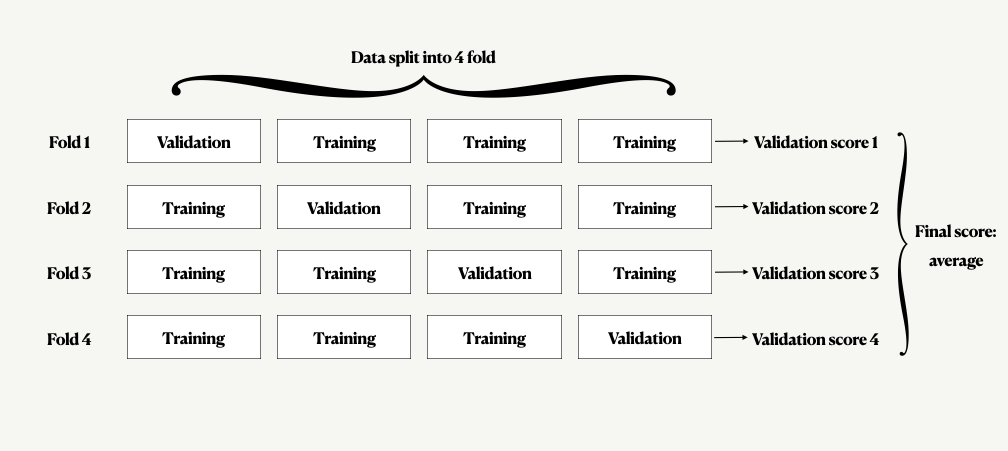

In [ ]:
def build model():
  # define your model

In [ ]:
import numpy as np

k = 4 # number of partitions
num_val_samples = len(train_set) // k

all_scores = []

for i in range(k):
  print('processing fold #', i)
  
  # prepare the validation data: data from partition #i
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare the training data: data from all other partitions
  partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  
  val_loss = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_loss)

In [ ]:
np.mean(all_scores)

* To keep a record of how well the model does at each epoch, we'll modify the training loop to save the per epoch validation score log.

In [ ]:
num_epochs = 100
k = 4 # number of partitions
num_val_samples = len(train_set) // k

all_scores = []

for k in range(k):
  print('processing fold #', i)
  
  # prepare the validation data: data from partition #i
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare the training data: data from all other partitions
  partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)

  all_scores.append(history.history['val_loss'])

* We can then compute the average of the per-epoch validation scores for all folds.

In [ ]:
average_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]


In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_history) + 1), average_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()